In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_mush = pd.read_csv(r'C:\Users\batman\Downloads\mushrooms.csv')
df_mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
max_len = 0
for col in df_mush.columns:
    print(col,' : \n')
    l = len(df_mush[col].unique())
    print(l)
    print(df_mush[col].value_counts(),'\n')
   
    if l>max_len:
        max_len = l
print(max_len)


class  : 

2
e    4208
p    3916
Name: class, dtype: int64 

cap-shape  : 

6
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

cap-surface  : 

4
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

cap-color  : 

10
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64 

bruises  : 

2
f    4748
t    3376
Name: bruises, dtype: int64 

odor  : 

9
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 

gill-attachment  : 

2
f    7914
a     210
Name: gill-attachment, dtype: int64 

gill-spacing  : 

2
c    6812
w    1312
Name: gill-spacing, dtype: int64 

gill-size  : 

2
b    5612
n    2512
Name: gill-size, dtype: int64 

gill-color  : 

12
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int6

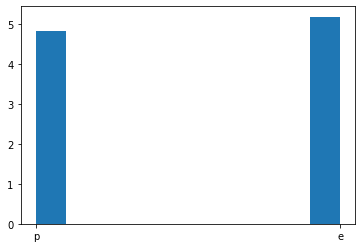

In [6]:
x_1= df_mush['class']
plt.hist(x_1,bins=None,density=True,histtype='bar')
plt.show()

In [7]:
df_mush['stalk-root'] = df_mush['stalk-root'].replace('?',np.nan)
df_mush['stalk-root'].tail()

8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, dtype: object

In [8]:
df_mush.dropna(inplace=True,how='any',axis=0)
df_mush.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7986,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [9]:
df_mush['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [10]:
df_mush.shape

(5644, 23)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,23):
    df_mush.iloc[:,i] = le.fit_transform(df_mush.iloc[:,i])
    

In [12]:
df_mush.head(10)
df_mush.shape

(5644, 23)

class                          AxesSubplot(0.125,0.826831;0.352273x0.053169)
cap-shape                   AxesSubplot(0.547727,0.826831;0.352273x0.053169)
cap-surface                    AxesSubplot(0.125,0.763028;0.352273x0.053169)
cap-color                   AxesSubplot(0.547727,0.763028;0.352273x0.053169)
bruises                        AxesSubplot(0.125,0.699225;0.352273x0.053169)
odor                        AxesSubplot(0.547727,0.699225;0.352273x0.053169)
gill-attachment                AxesSubplot(0.125,0.635423;0.352273x0.053169)
gill-spacing                AxesSubplot(0.547727,0.635423;0.352273x0.053169)
gill-size                       AxesSubplot(0.125,0.57162;0.352273x0.053169)
gill-color                   AxesSubplot(0.547727,0.57162;0.352273x0.053169)
stalk-shape                    AxesSubplot(0.125,0.507817;0.352273x0.053169)
stalk-root                  AxesSubplot(0.547727,0.507817;0.352273x0.053169)
stalk-surface-above-ring       AxesSubplot(0.125,0.444014;0.352273x0.053169)

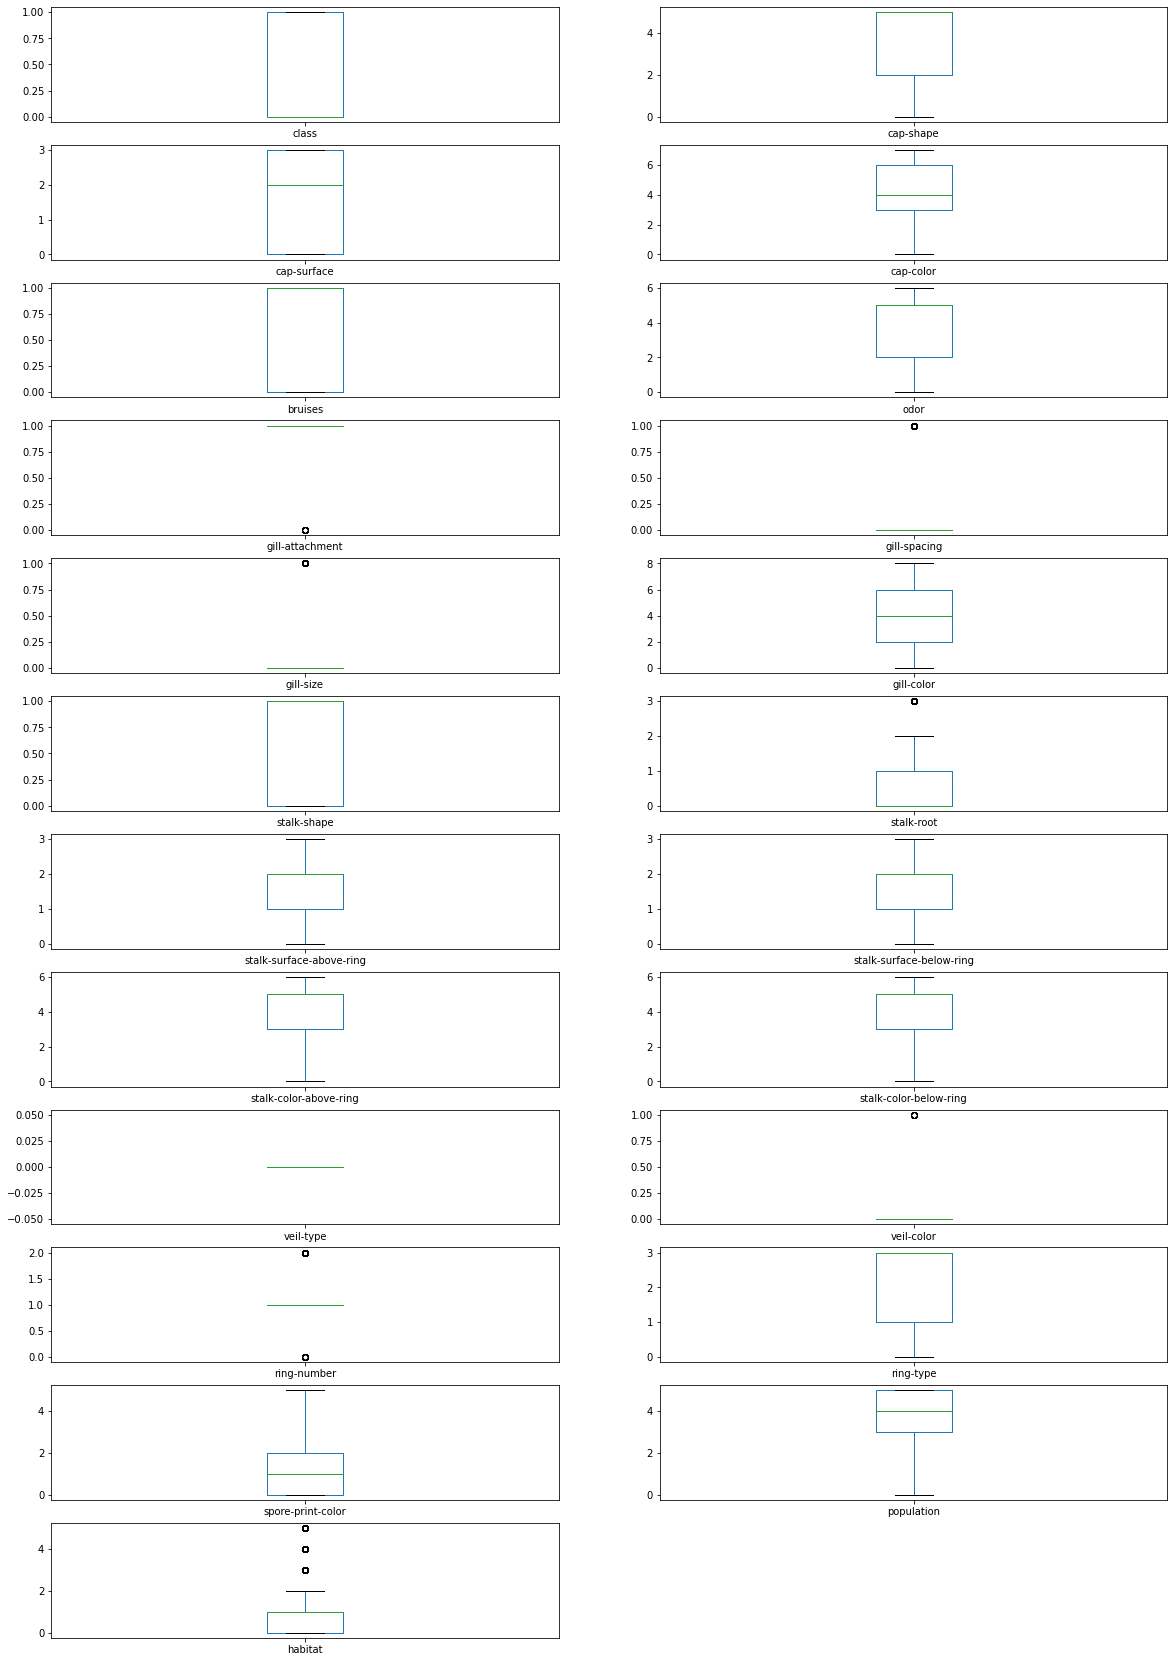

In [13]:
#outliers,skewness and defining
df_mush.plot(kind='box',subplots=True,figsize=(20,30),layout=(12,2))

In [14]:
df_mush.skew()

class                        0.485855
cap-shape                   -0.303560
cap-surface                 -0.259824
cap-color                    0.133049
bruises                     -0.258762
odor                        -0.502179
gill-attachment            -17.627362
gill-spacing                 1.653728
gill-size                    2.272069
gill-color                   0.105284
stalk-shape                 -0.041125
stalk-root                   1.144226
stalk-surface-above-ring    -1.199832
stalk-surface-below-ring    -0.846262
stalk-color-above-ring      -1.421169
stalk-color-below-ring      -1.394369
veil-type                    0.000000
veil-color                  26.511790
ring-number                  3.008569
ring-type                   -0.702761
spore-print-color            1.123883
population                  -1.415451
habitat                      1.239006
dtype: float64

In [15]:
df_mush.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.053155,0.046859,0.150741,-0.435562,-0.455566,-0.071945,-0.264160,0.215289,-0.318339,...,-0.363604,-0.317244,-0.308613,NaN,0.047921,0.008615,-0.215200,-0.507034,0.203882,0.297412
cap-shape,0.053155,1.000000,-0.068688,-0.056421,-0.097782,0.000011,0.002963,0.051432,0.103443,-0.006431,...,-0.029780,-0.030272,-0.029700,NaN,-0.043596,-0.118191,-0.029420,-0.062007,0.048283,-0.057451
cap-surface,0.046859,-0.068688,1.000000,0.093355,0.228590,-0.108697,-0.058104,-0.204448,-0.042356,0.073668,...,0.162293,0.045018,0.046099,NaN,0.038702,0.044289,0.190188,0.054747,-0.000390,0.106918
cap-color,0.150741,-0.056421,0.093355,1.000000,-0.165794,-0.400652,0.059693,0.062189,0.102676,-0.242099,...,-0.047284,0.046088,0.056865,NaN,0.055906,-0.006358,-0.142629,-0.105214,-0.171096,0.196001
bruises,-0.435562,-0.097782,0.228590,-0.165794,1.000000,0.235055,0.064351,-0.439183,-0.040178,0.470309,...,0.552523,0.243577,0.256369,NaN,-0.042863,0.122162,0.861993,0.292185,0.196296,-0.114367
odor,-0.455566,0.000011,-0.108697,-0.400652,0.235055,1.000000,-0.013940,0.195187,0.049305,0.303104,...,0.133688,0.131815,0.122807,NaN,0.030623,0.094874,0.041458,0.397319,-0.059285,-0.223349
gill-attachment,-0.071945,0.002963,-0.058104,0.059693,0.064351,-0.013940,1.000000,0.026630,0.021353,-0.098267,...,-0.108225,0.109340,0.108756,NaN,0.002131,0.346682,0.004571,-0.202135,0.115499,0.043755
gill-spacing,-0.264160,0.051432,-0.204448,0.062189,-0.439183,0.195187,0.026630,1.000000,0.178484,-0.098702,...,-0.266521,0.326465,0.302918,NaN,0.080026,-0.042316,-0.596261,0.286257,-0.595910,-0.106367
gill-size,0.215289,0.103443,-0.042356,0.102676,-0.040178,0.049305,0.021353,0.178484,1.000000,0.064420,...,0.169387,0.262655,0.233227,NaN,0.099801,-0.033931,0.210490,0.287764,-0.008851,0.169763
gill-color,-0.318339,-0.006431,0.073668,-0.242099,0.470309,0.303104,-0.098267,-0.098702,0.064420,1.000000,...,0.362442,0.124320,0.107444,NaN,0.065453,0.026691,0.423308,0.404772,0.105207,-0.176599


In [16]:
df_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.381999,3.420269,1.627215,4.272856,0.564139,3.564848,0.996811,0.181432,0.124734,3.536853,...,1.619419,3.949681,3.932672,0.0,0.001417,1.014883,2.096386,1.215450,3.712970,1.236003
std,0.485919,1.659641,1.336497,1.838018,0.495913,1.765806,0.056388,0.385410,0.330447,2.281428,...,0.721620,1.526058,1.525402,0.0,0.037625,0.165600,1.192716,1.059125,1.328741,1.597981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,3.000000,3.000000,0.0,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,5.000000,2.000000,4.000000,1.000000,5.000000,1.000000,0.000000,0.000000,4.000000,...,2.000000,5.000000,5.000000,0.0,0.000000,1.000000,3.000000,1.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,6.000000,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,...,2.000000,5.000000,5.000000,0.0,0.000000,1.000000,3.000000,2.000000,5.000000,1.000000
max,1.000000,5.000000,3.000000,7.000000,1.000000,6.000000,1.000000,1.000000,1.000000,8.000000,...,3.000000,6.000000,6.000000,0.0,1.000000,2.000000,3.000000,5.000000,5.000000,5.000000


In [17]:
df_mush.drop(columns=['veil-type','ring-type','veil-color','gill-attachment'],inplace=True)
df_mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,2,0,2,2,2,5,5,1,1,3,5
1,0,5,2,7,1,0,0,0,2,0,1,2,2,5,5,1,2,2,1
2,0,0,2,6,1,3,0,0,3,0,1,2,2,5,5,1,2,2,3
3,1,5,3,6,1,6,0,1,3,0,2,2,2,5,5,1,1,3,5
4,0,5,2,3,0,5,1,0,2,1,2,2,2,5,5,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,0,0,7,0,0,3,3,3,3,2,5,5,4
8001,0,5,3,4,0,5,0,0,7,0,0,3,3,3,3,2,5,5,4
8038,0,5,3,3,1,5,0,0,7,0,0,2,2,5,5,2,5,5,4
8095,1,5,3,1,0,4,0,0,8,0,1,1,3,1,1,0,5,1,0


In [18]:
from scipy.stats import zscore
z = np.abs(zscore(df_mush))
np.where(z>3)

(array([4101, 4160, 4269, 4351, 4471, 4522, 4674, 4789, 4795, 4798, 4830,
        4870, 4898, 4927, 5000, 5010, 5015, 5017, 5023, 5028, 5032, 5034,
        5038, 5041, 5044, 5046, 5060, 5061, 5067, 5070, 5085, 5091, 5096,
        5097, 5103, 5109, 5118, 5121, 5123, 5133, 5140, 5141, 5152, 5154,
        5156, 5158, 5159, 5176, 5181, 5186, 5187, 5196, 5198, 5209, 5218,
        5222, 5240, 5244, 5248, 5258, 5259, 5267, 5274, 5277, 5286, 5287,
        5288, 5296, 5299, 5303, 5304, 5306, 5308, 5311, 5313, 5314, 5315,
        5317, 5319, 5323, 5325, 5331, 5334, 5337, 5354, 5356, 5367, 5375,
        5376, 5384, 5388, 5389, 5394, 5398, 5401, 5404, 5405, 5409, 5415,
        5417, 5419, 5423, 5424, 5427, 5428, 5435, 5443, 5453, 5455, 5465,
        5466, 5469, 5471, 5479, 5489, 5491, 5509, 5510, 5513, 5517, 5519,
        5520, 5528, 5529, 5534, 5538, 5541, 5548, 5552, 5552, 5553, 5553,
        5554, 5554, 5555, 5555, 5556, 5556, 5557, 5558, 5558, 5559, 5559,
        5560, 5560, 5561, 5561, 5562, 

In [19]:
df_new = df_mush[(z<3).all(axis=1)]
df_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,2,0,2,2,2,5,5,1,1,3,5
1,0,5,2,7,1,0,0,0,2,0,1,2,2,5,5,1,2,2,1
2,0,0,2,6,1,3,0,0,3,0,1,2,2,5,5,1,2,2,3
3,1,5,3,6,1,6,0,1,3,0,2,2,2,5,5,1,1,3,5
4,0,5,2,3,0,5,1,0,2,1,2,2,2,5,5,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,1,2,2,6,1,2,0,0,1,1,0,2,0,5,5,1,0,3,5
5990,1,2,0,7,0,2,0,0,4,0,0,1,1,3,3,1,0,5,0
5993,1,2,3,7,0,2,0,0,0,0,0,1,1,0,4,1,0,4,1
5998,1,2,2,0,1,2,0,0,4,1,0,2,0,5,5,1,0,4,5


In [20]:
df_new.skew()

class                       0.518166
cap-shape                  -0.321402
cap-surface                -0.219149
cap-color                   0.181991
bruises                    -0.267931
odor                       -0.440508
gill-spacing                1.693115
gill-size                   2.368941
gill-color                  0.139174
stalk-shape                -0.124167
stalk-root                  1.103366
stalk-surface-above-ring   -1.244248
stalk-surface-below-ring   -0.879536
stalk-color-above-ring     -1.424987
stalk-color-below-ring     -1.424987
ring-number                 0.000000
spore-print-color           0.180287
population                 -1.435341
habitat                     1.295609
dtype: float64

In [21]:
from scipy.stats import boxcox

for col in df_new.columns:
    for col in df_new.columns:
        if df_new.skew().loc[col] > 0.55:
            df_new[col] = np.log1p(df_new[col])

In [22]:
df_new.skew()

class                       0.518166
cap-shape                  -0.321402
cap-surface                -0.219149
cap-color                   0.181991
bruises                    -0.267931
odor                       -0.440508
gill-spacing                1.693115
gill-size                   2.368941
gill-color                  0.139174
stalk-shape                -0.124167
stalk-root                  0.697284
stalk-surface-above-ring   -1.244248
stalk-surface-below-ring   -0.879536
stalk-color-above-ring     -1.424987
stalk-color-below-ring     -1.424987
ring-number                 0.000000
spore-print-color           0.180287
population                 -1.435341
habitat                     0.337731
dtype: float64

In [23]:
df_new['ring-number'].unique()

array([1])

In [24]:
df_new.drop(columns = 'ring-number',inplace=True)

In [25]:
x = df_new.drop(columns='class')
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,population,habitat
0,5,2,4,1,6,0.000000,0.098758,2,0,0.104915,2,2,5,5,1,3,1.026672
1,5,2,7,1,0,0.000000,0.000000,2,0,0.098758,2,2,5,5,2,2,0.526589
2,0,2,6,1,3,0.000000,0.000000,3,0,0.098758,2,2,5,5,2,2,0.869742
3,5,3,6,1,6,0.000000,0.098758,3,0,0.104915,2,2,5,5,1,3,1.026672
4,5,2,3,0,5,0.098758,0.000000,2,1,0.104915,2,2,5,5,2,0,0.526589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,2,2,6,1,2,0.000000,0.000000,1,1,0.000000,2,0,5,5,0,3,1.026672
5990,2,0,7,0,2,0.000000,0.000000,4,0,0.000000,1,1,3,3,0,5,0.000000
5993,2,3,7,0,2,0.000000,0.000000,0,0,0.000000,1,1,0,4,0,4,0.526589
5998,2,2,0,1,2,0.000000,0.000000,4,1,0.000000,2,0,5,5,0,4,1.026672


In [26]:
y = df_new.loc[:,'class']
y

0       1
1       0
2       0
3       1
4       0
       ..
5988    1
5990    1
5993    1
5998    1
5999    1
Name: class, Length: 5424, dtype: int32

In [27]:
from sklearn.decomposition import PCA
pca =PCA(n_components=15)
xpca = pca.fit_transform(x)
x = xpca
x_1 = pd.DataFrame(x)
x_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.615820,-1.110252,-2.664190,-1.139221,-0.270798,-1.607446,2.674820e-16,-0.485859,0.237992,-1.123964,-0.069677,0.512606,0.553183,-0.308784,0.049944
1,3.079813,-3.338115,1.317197,-2.265174,0.635129,0.532048,2.588904e-15,-0.024736,-1.615550,0.230734,-0.161298,-0.226603,0.291624,-0.231055,-0.033685
2,0.763650,-3.301495,0.696700,3.061995,-0.218226,0.040073,-2.785442e-16,0.094100,-0.907652,-0.150755,-0.051683,0.350771,0.387943,-0.211716,-0.009811
3,-0.552119,-2.039642,-0.949821,-1.369986,-1.183059,-2.649774,-7.501910e-16,-0.253935,0.601512,-1.030785,-0.088177,0.415012,0.455440,-0.224622,0.055424
4,-0.688898,-2.125027,-3.521321,-1.177697,0.440334,-0.714780,4.606056e-15,1.894093,-1.669321,-0.450114,-0.048583,0.186181,-0.356927,0.397651,-0.003382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,3.004027,-2.312736,-0.247309,1.160105,0.605694,0.177121,-1.134340e-16,-0.032186,1.047463,-0.052983,-1.537127,-0.834546,0.680034,0.320116,0.044949
5420,2.020737,0.575724,2.606793,0.980579,-1.983478,1.599443,1.653575e-15,-0.419858,1.175910,0.077379,-0.005740,-0.062867,-0.501873,-0.239524,-0.020684
5421,5.307088,0.833869,0.943319,1.519708,-0.659445,-1.659471,-2.828427e+00,0.421639,0.161003,0.022388,-0.018001,-0.130119,-0.131388,0.067507,0.019785
5422,-1.452548,0.682491,-0.789237,1.466353,4.215914,1.830562,7.581539e-16,0.589553,1.076282,0.084692,-1.432995,-0.066719,0.686242,0.255320,0.017470


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=10,scoring='accuracy')
    grd.fit(x_1,y)
    return [grd.best_params_, grd.best_score_]

In [30]:
#logistics reg
lg =LogisticRegression()
cvs = cross_val_score(lg,x_1,y,cv=10,scoring='accuracy')
cvs.mean()

0.8959083402988727

In [31]:
#decision tree
dtc = DecisionTreeClassifier()
para ={
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
best_parameter(dtc,para)

[{'criterion': 'entropy', 'splitter': 'random'}, 0.9950228673557454]

In [32]:
#RFC
rfc = RandomForestClassifier()
para ={
    'n_estimators':list(range(2,20,2)),
    'criterion':['gini','entropy']
}
best_parameter(rfc,para)

[{'criterion': 'gini', 'n_estimators': 10}, 1.0]

In [33]:
#SVM
svc =SVC()
para = {
    'C':list(range(1,21,2)),
    'gamma':['scale','auto'],
    'kernel':['rbf','linear']
}
best_parameter(svc,para)

[{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, 1.0]

In [34]:
#Both RandomForestClassifier and SVC has highest accuracy so can choose anyone 
rfc = RandomForestClassifier(criterion = 'gini', n_estimators = 18)
cv_score = cross_val_score(rfc,x_1,y,cv=10,scoring='accuracy')
cv_score.mean()

1.0